# Visualizer test

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
#from matplotlib.animation import PillowWriter
from IPython.display import HTML
import math
import numpy as np
import seaborn as sns

In [2]:
from environment_factory import Environment
from astar_agent import Astar_Agent
import random

# Making Grid world

In [3]:
grid = [
    [9, 9, 9, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 9, 9, 9, 9],
    [9, 9, 9, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 9, 9, 0, 9],
    [9, 9, 9, 0, 0, 0, 0, 9],
    [2, 0, 0, 0, 9, 9, 9, 9],
]

env = Environment(grid)

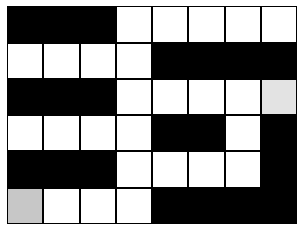

In [4]:
sns.heatmap(grid,square=True,cbar=False,cmap='gray_r',linewidths=1, linecolor='Black', fmt='s'
           ,xticklabels=False, yticklabels=False)
plt.show()

# Random agent

Episode 0: Agent gets -2.585714285714285 reward. 0.014285714285714285 0.7857142857142857 0.0


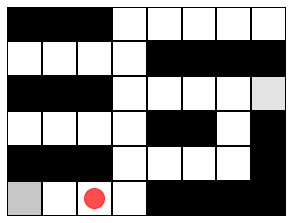

In [5]:
# Initialize position of agent.
state = env.reset()
total_reward = 0
total_product = 0
total_stock = 0
total_input = 0
done = False
step = 0
i = 0
while not done:
    env.render(state, done)
    step +=1
    
    # Random action
    action = random.choice(env.actions)
    next_state, reward, done = env.step(action)

    # Reward
    total_reward += reward
    total_product += env.assembly.product
    total_stock += env.assembly_in.product_all
    total_input += env.assembly.stock

    state = next_state

    #print(state.row, state.column, state.agv_stock, action, reward)
    #print(state, env.actions[action], 'reward', reward, env.assembly.product, env.assembly_in.product_all)
print("Episode {}: Agent gets {} reward.".format(i, total_reward), 
      total_product/step, total_stock/step, total_input/step)
HTML(env.render(state, done).to_jshtml())

# A* agent

Episode 0: Agent gets 7.5 reward. 0.05714285714285714 0.6 0.1


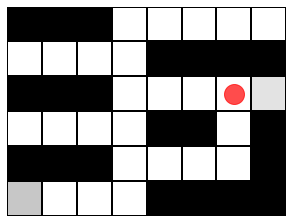

In [6]:
# Initialize position of agent.
state = env.reset()
astar_agent = Astar_Agent(grid)
total_reward = 0
total_product = 0
total_stock = 0
total_input = 0
done = False
step = 0
i = 0
while not done:
    env.render(state, done)
    step +=1
    action = astar_agent.action()
    next_state, reward, done = env.step(env.actions[action])

    # Reward
    total_reward += reward
    total_product += env.assembly.product
    total_stock += env.assembly_in.product_all
    total_input += env.assembly.stock

    state = next_state

    #print(state.row, state.column, state.agv_stock, action, reward)
    #print(state, env.actions[action], 'reward', reward, env.assembly.product, env.assembly_in.product_all)
print("Episode {}: Agent gets {} reward.".format(i, total_reward), 
      total_product/step, total_stock/step, total_input/step)
HTML(env.render(state, done).to_jshtml())

Episode 0: Agent gets 7.542857142857143 reward. 0.05714285714285714 0.6 0.05714285714285714


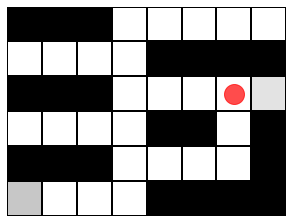

In [7]:
for i in range(1):
    # Initialize position of agent.
    state = env.reset()
    astar_agent = Astar_Agent(grid)
    total_reward = 0
    total_product = 0
    total_stock = 0
    total_input = 0
    done = False
    step = 0
    while not done:
        env.render(state, done)
        step += 1
        action = astar_agent.action_standby([state.row, state.column], state.agv_stock)
        next_state, reward, done = env.step(env.actions[action])
        
        # Reward
        total_reward += reward
        total_product += env.assembly.product
        total_stock += env.assembly_in.product_all
        total_input += env.assembly.stock
        
        state = next_state
        
        #print(state.row, state.column, state.agv_stock, action, reward)
        #print(state, env.actions[action], 'reward', reward, env.assembly.product, env.assembly_in.product_all)
        #print(env.assembly_in.product_all, env.assembly.stock)
    print("Episode {}: Agent gets {} reward.".format(i, total_reward), 
          total_product/step, total_stock/step, total_input/step) 
HTML(env.render(state, done).to_jshtml())

経路計画部のシミュレーション可視化機能はひとまず完成。

# Stock and Product Visualization

In [8]:
grid = [
    [9, 9, 9, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 9, 9, 9, 9],
    [9, 9, 9, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 9, 9, 0, 9],
    [9, 9, 9, 0, 0, 0, 0, 9],
    [2, 0, 0, 0, 9, 9, 9, 9],
]

env = Environment(grid)

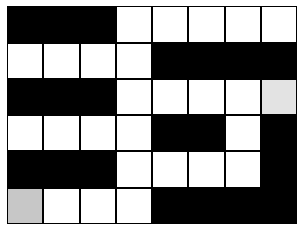

In [9]:
sns.heatmap(grid,square=True,cbar=False,cmap='gray_r',linewidths=1, linecolor='Black', fmt='s'
           ,xticklabels=False, yticklabels=False)
plt.show()

Episode 0: Agent gets 7.5 reward. 0.05714285714285714 0.6428571428571429 0.05714285714285714


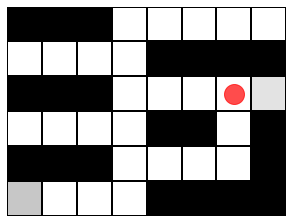

In [13]:
for i in range(1):
    # Initialize position of agent.
    state = env.reset()
    astar_agent = Astar_Agent(grid)
    total_reward = 0
    total_product = 0
    total_inproduct = env.agv_stock
    total_stock = 0
    total_input = 0
    done = False
    step = 0
    # - product test --
    history_product = []
    history_stock = []
    
    while not done:
        env.render(state, done)
        step += 1
        
        # Random action
        #action = random.choice(env.actions)
        #next_state, reward, done = env.step(action)
        
        # Astar action
        action = astar_agent.action_standby([state.row, state.column], state.agv_stock)
        next_state, reward, done = env.step(env.actions[action])
        
        # Reward
        total_reward += reward
        total_product += env.assembly.product
        total_inproduct += env.assembly_in.product
        total_stock += env.assembly_in.product_all
        total_input += env.assembly.stock
        
        state = next_state
        
        # history of product
        history_product.append([step, env.assembly.product, total_product, env.assembly_in.product, total_inproduct])
        # history of stock
        history_stock.append([step, env.assembly_in.product_all, total_stock, 
                              env.assembly.stock, total_input])
              
    print("Episode {}: Agent gets {} reward.".format(i, total_reward), 
          total_product/step, total_stock/step, total_input/step) 
HTML(env.render(state, done).to_jshtml())

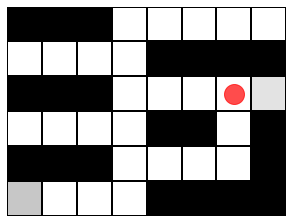

In [14]:
env.render(state, done).save("a_star.gif", writer="pillow")
env.render(state, done).save("a_star_mp.mp4", writer="ffmpeg")
plt.close()

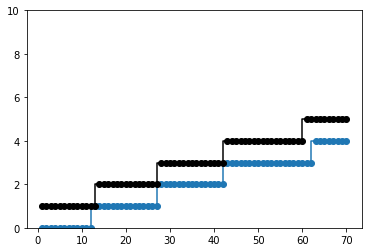

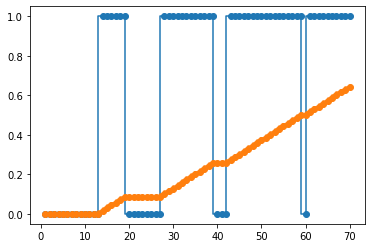

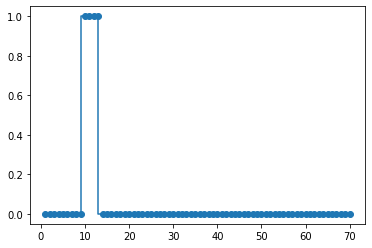

In [16]:
new_history_product = np.array(history_product)
new_history_stock = np.array(history_stock)

#plt.step(new_history_product[:, 0], new_history_product[:, 1], '-o')
plt.step(new_history_product[:, 0], new_history_product[:, 2], '-o')
#plt.step(new_history_product[:, 0], new_history_product[:, 3], '-o')
plt.step(new_history_product[:, 0], new_history_product[:, 4], '-o', color='Black')
plt.ylim(0, 10)
plt.show()
plt.step(new_history_stock[:, 0], new_history_stock[:, 1], '-o')
plt.step(new_history_stock[:, 0], new_history_stock[:, 2]/step, '-o')
plt.show()
plt.step(new_history_stock[:, 0], new_history_stock[:, 3], '-o')
#plt.step(new_history_stock[:, 0], new_history_stock[:, 4], '-o')
plt.show()